In [ ]:
!pip install ultralytics
!pip install gdown

In [ ]:
#Get Annotated Data
#example dataset at https://universe.roboflow.com/seraphs-place/plant-disease-jyfln

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1uEfQ13vi_ty1-0yM3U4A2fXFgaOzNd5E
From (redirected): https://drive.google.com/uc?id=1uEfQ13vi_ty1-0yM3U4A2fXFgaOzNd5E&confirm=t&uuid=901d19fb-8dd0-46f0-a718-0875e7327899
To: /kaggle/working/Dataset.zip
100%|███████████████████████████████████████| 5.92G/5.92G [00:56<00:00, 105MB/s]


In [ ]:
import zipfile
z= zipfile.ZipFile('/kaggle/working/Dataset.zip')
z.extractall()

In [ ]:
#Loading Yolo with trained model
from ultralytics import YOLO
model = YOLO("yolov8n.pt").load('/kaggle/input/yolo-model/kaggle/working/runs/detect/train22/weights/best.pt')
/kaggle/working/runs/detect/train2/weights/best.pt

100%|██████████| 6.23M/6.23M [00:00<00:00, 73.7MB/s]


Transferred 319/355 items from pretrained weights


In [ ]:
#Finetuning Yolo for extra 30 epochs according to our dataset + addition of manually annotated data from Plant Dataset
model.train(data = "/kaggle/working/Dataset/data.yaml", epochs=30)

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Dataset/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None,

wandb: Currently logged in as: k201682. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/working/Dataset/train/labels.cache... 3660 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3660/3660 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/working/Dataset/valid/labels.cache... 773 images, 0 backgrounds, 0 corrupt: 100%|██████████| 773/773 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.37G     0.8939     0.9762      1.325         18        640: 100%|██████████| 229/229 [03:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:34<00:00,  1.38s/it]

                   all        773       1360      0.665      0.686      0.721       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.35G     0.9974      1.063      1.405         19        640: 100%|██████████| 229/229 [03:36<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]

                   all        773       1360      0.575      0.627       0.62      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.34G       1.07      1.132      1.478         23        640: 100%|██████████| 229/229 [03:34<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:36<00:00,  1.48s/it]

                   all        773       1360      0.447      0.579      0.557      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.34G      1.089      1.123      1.495         18        640: 100%|██████████| 229/229 [03:38<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:34<00:00,  1.39s/it]

                   all        773       1360      0.625       0.61      0.645      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.34G      1.056      1.093      1.467         29        640: 100%|██████████| 229/229 [03:36<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:34<00:00,  1.39s/it]

                   all        773       1360      0.649      0.647      0.696      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.34G      1.055      1.078      1.463         20        640: 100%|██████████| 229/229 [03:35<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]

                   all        773       1360      0.646      0.653      0.697        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.34G      1.038      1.043      1.443         18        640: 100%|██████████| 229/229 [03:37<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:34<00:00,  1.38s/it]

                   all        773       1360       0.63      0.584      0.616      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.34G      1.001     0.9985      1.417         26        640: 100%|██████████| 229/229 [03:31<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:35<00:00,  1.42s/it]

                   all        773       1360      0.649      0.617      0.668      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.34G     0.9851     0.9805      1.405         20        640: 100%|██████████| 229/229 [03:33<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]

                   all        773       1360      0.702      0.629      0.715      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.34G     0.9768      0.967      1.394         14        640: 100%|██████████| 229/229 [03:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:35<00:00,  1.41s/it]

                   all        773       1360      0.696      0.659       0.73      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.34G     0.9543     0.9471      1.376         20        640: 100%|██████████| 229/229 [03:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:36<00:00,  1.47s/it]

                   all        773       1360      0.621      0.694      0.702      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.34G     0.9406     0.9258       1.36         15        640: 100%|██████████| 229/229 [03:32<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:35<00:00,  1.42s/it]

                   all        773       1360      0.734      0.669       0.75      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.34G     0.9225     0.9004      1.355         18        640: 100%|██████████| 229/229 [03:33<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:34<00:00,  1.37s/it]

                   all        773       1360      0.699      0.641      0.697      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.34G      0.927      0.863      1.342         25        640: 100%|██████████| 229/229 [03:34<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:35<00:00,  1.42s/it]

                   all        773       1360      0.715      0.607      0.712      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.34G     0.9013      0.851      1.327         23        640: 100%|██████████| 229/229 [03:34<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:34<00:00,  1.39s/it]

                   all        773       1360      0.663      0.662      0.705      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.34G     0.8835     0.8315      1.313         20        640: 100%|██████████| 229/229 [03:34<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:35<00:00,  1.42s/it]

                   all        773       1360      0.684      0.665      0.743      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.34G     0.8729     0.8294      1.301         22        640: 100%|██████████| 229/229 [03:35<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]

                   all        773       1360       0.69       0.66      0.731      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.34G     0.8594     0.7907      1.287         19        640: 100%|██████████| 229/229 [03:37<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]

                   all        773       1360      0.684      0.766      0.773      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.34G     0.8447     0.7772      1.277         18        640: 100%|██████████| 229/229 [03:35<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:33<00:00,  1.33s/it]

                   all        773       1360      0.626      0.655      0.687      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.34G     0.8244     0.7682      1.269         23        640: 100%|██████████| 229/229 [03:33<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:35<00:00,  1.41s/it]

                   all        773       1360      0.695      0.692       0.75      0.568


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.34G     0.8159     0.7431      1.253         17        640: 100%|██████████| 229/229 [03:39<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:36<00:00,  1.45s/it]

                   all        773       1360      0.729      0.703      0.777      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.34G      0.802     0.7109      1.241         20        640: 100%|██████████| 229/229 [03:36<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:34<00:00,  1.37s/it]

                   all        773       1360      0.691      0.702      0.752      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.34G     0.7949     0.7171      1.241         18        640: 100%|██████████| 229/229 [03:36<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:34<00:00,  1.36s/it]

                   all        773       1360      0.705      0.661      0.756      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.34G      0.781      0.702      1.225         23        640: 100%|██████████| 229/229 [03:38<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:35<00:00,  1.44s/it]

                   all        773       1360      0.715      0.662      0.749      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.34G     0.7623     0.6757      1.213         15        640: 100%|██████████| 229/229 [03:36<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:35<00:00,  1.40s/it]

                   all        773       1360      0.673      0.697      0.756      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.34G     0.7548     0.6626      1.206         27        640: 100%|██████████| 229/229 [03:38<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:35<00:00,  1.41s/it]

                   all        773       1360      0.751       0.72      0.785      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.34G     0.7459     0.6389      1.196         23        640: 100%|██████████| 229/229 [03:36<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:34<00:00,  1.39s/it]

                   all        773       1360       0.75      0.711      0.787      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.34G     0.7367     0.6375      1.196         16        640: 100%|██████████| 229/229 [03:35<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:34<00:00,  1.39s/it]

                   all        773       1360      0.719      0.712      0.768      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.34G     0.7206     0.6103       1.18         24        640: 100%|██████████| 229/229 [03:38<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:35<00:00,  1.40s/it]

                   all        773       1360      0.702       0.74      0.784      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.34G     0.7196     0.6081      1.178         23        640: 100%|██████████| 229/229 [03:37<00:00,  1.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:33<00:00,  1.35s/it]

                   all        773       1360      0.732      0.734       0.79      0.609



30 epochs completed in 2.105 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:39<00:00,  1.59s/it]


                   all        773       1360      0.731      0.734       0.79       0.61
             unhealthy        773       1213      0.834      0.781      0.874      0.668
               healthy        773        147      0.628      0.687      0.706      0.551
Speed: 0.6ms preprocess, 2.2ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train2


lr/pg0,▃▆███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg1,▃▆███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
lr/pg2,▃▆███▇▇▇▇▆▆▆▆▅▅▅▅▄▄▄▃▃▃▃▂▂▂▂▁▁
metrics/mAP50(B),▆▃▁▄▅▅▃▄▆▆▅▇▅▆▅▇▆▇▅▇█▇▇▇▇██▇██
metrics/mAP50-95(B),▆▃▁▄▄▅▃▄▅▅▅▆▅▅▅▆▆▇▅▇▇▇▇▇▇█████
metrics/precision(B),▆▄▁▅▆▆▅▆▇▇▅█▇▇▆▆▇▆▅▇▇▇▇▇▆██▇▇█
metrics/recall(B),▅▃▁▂▄▄▁▂▃▄▅▄▃▂▄▄▄█▄▅▆▆▄▄▅▆▆▆▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▄▆██▇▇▇▆▆▆▅▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b9dd4fb5f00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
#opened our trained model
from ultralytics import YOLO
model = YOLO("yolov8n.pt").load('/kaggle/working/runs/detect/train2/weights/best.pt')

Transferred 319/355 items from pretrained weights



116 248 273 479
Confidence ---> 0.8
Class name --> unhealthy
762 324 1024 510
Confidence ---> 0.68
Class name --> unhealthy
409 3 644 225
Confidence ---> 0.41
Class name --> unhealthy
0 7 157 366
Confidence ---> 0.37
Class name --> unhealthy
306 0 785 63
Confidence ---> 0.29
Class name --> unhealthy
0 0 293 279
Confidence ---> 0.26
Class name --> unhealthy
0: 320x640 6 persons, 8.3ms
Speed: 7.3ms preprocess, 8.3ms inference, 2.3ms postprocess per image at shape (1, 3, 320, 640)


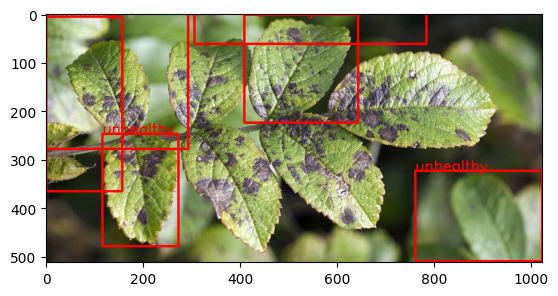

In [ ]:
#checking a prediction
import  matplotlib.pyplot as plt
import cv2
import numpy as np
import math
import torch
classNames = ['unhealthy','healthy']

def YOLO_showImg(img):
    results = model(img, stream=True)
    # coordinates
    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1.item()), int(y1.item()), int(x2.item()), int(y2.item()) # convert to int values
            print(x1, y1, x2, y2)
            # Assuming img is a PyTorch tensor and might not be in 'uint8' format
            if torch.is_tensor(img):
                img = img.permute(1, 2, 0)  # if necessary, adjust channel order
                img = img.cpu().numpy()
                img = (img * 255).astype(np.uint8)  # Scale and convert to uint8

            img = np.ascontiguousarray(img)


            # class name
            cls = int(box.cls[0])

            if cls==0:
                classname = 'unhealthy'
            else:
                classname= 'healthy'

            if classname=='unhealthy':
                color = (255, 0, 0)
            else:
                color = (0,255,0)

            cv2.rectangle(img, (x1, y1), (x2, y2), color, 3)
            # confidence
            confidence = math.ceil((box.conf[0]*100))/100
            print("Confidence --->", confidence)
            print("Class name -->", classname)
            # object details
            org = [x1, y1]
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 1

            thickness = 2
            cv2.putText(img, classname, org, font, fontScale, color, thickness)
    return img

res = YOLO_showImg(cv2.imread('/kaggle/input/sample/plant3.jpg')[:,:,::-1])

plt.imshow(res)

In [ ]:
#Get Dataset from kaggle or drive for testing
#!gdown

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=10nDzx_CuHUjY_KzW7CQ8paX2rCjvErKh
From (redirected): https://drive.google.com/uc?id=10nDzx_CuHUjY_KzW7CQ8paX2rCjvErKh&confirm=t&uuid=433b9182-fdb3-4ef8-8c3b-a59c96bf2f80
To: /kaggle/working/Plant Dataset.zip
100%|██████████████████████████████████████| 2.77G/2.77G [00:29<00:00, 94.6MB/s]


In [ ]:
import zipfile
z= zipfile.ZipFile('/kaggle/working/Plant Dataset.zip')
z.extractall()


752 353 1395 1590
Confidence ---> 0.78
Class name --> healthy
2179 1489 2832 2353
Confidence ---> 0.68
Class name --> unhealthy
0 2703 312 3346
Confidence ---> 0.45
Class name --> healthy
0 0 192 258
Confidence ---> 0.32
Class name --> healthy
2057 608 3041 2343
Confidence ---> 0.31
Class name --> unhealthy
Speed: 133.5ms preprocess, 6.9ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)

1226 177 2278 917
Confidence ---> 0.98
Class name --> unhealthy
601 0 1307 672
Confidence ---> 0.65
Class name --> unhealthy
316 370 1112 880
Confidence ---> 0.53
Class name --> unhealthy
0 306 177 2204
Confidence ---> 0.41
Class name --> unhealthy
2118 199 2989 1553
Confidence ---> 0.38
Class name --> unhealthy
2457 1750 3048 3207
Confidence ---> 0.38
Class name --> healthy
1177 561 1362 879
Confidence ---> 0.37
Class name --> healthy
1288 3421 2633 4064
Confidence ---> 0.35
Class name --> healthy
1115 510 1348 917
Confidence ---> 0.31
Class name --> healthy
913 1010 2090 2041
Confid

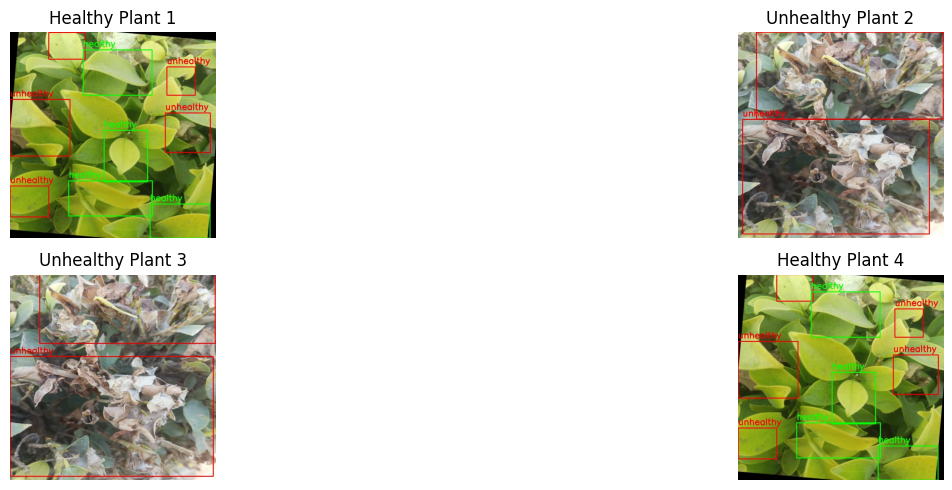

In [ ]:
#Lets run it on few sample on our leaf dataset
import matplotlib.pyplot as plt
import cv2
import os

main_dir = '/kaggle/working/Plant Dataset'
categories = ['Healthy Plant', 'Unhealthy Plant']

fig, axes = plt.subplots(len(categories), 2, figsize=(10, 5))
axes = axes.flatten()

for i, category in enumerate(categories):
    folder_path = os.path.join(main_dir, category)
    images = os.listdir(folder_path)[:2]

    for j, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)[:,:,::-1]
        processed_img = YOLO_showImg(img)

        ax = axes[i * 2 + j]
        ax.imshow(processed_img)
        ax.axis('off')
        ax.set_title(f"{category} {j+1}")

plt.tight_layout()
plt.show()

In [ ]:
# Datasets links
#Annotated Data we created : https://universe.roboflow.com/seraphs-place/plant-disease-jyfln
#Annotated Data of FieldPlant : https://universe.roboflow.com/plant-disease-detection/fieldplant/dataset/11